# `FedAvg (E=1, q=1.0, lr=0.001)`

In [2]:
from graph_utils.plot_lib import initialize, plot, plot_processed, plot_l2_norms, plot_cosine_similarity
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
initialize()
E_1_LR_0_001 = pd.read_csv('raw_data/METRICS_seed__clients_100_q_100_epoch_1_lr_0.001.csv', header=[0,1])

## Overview


### Loss

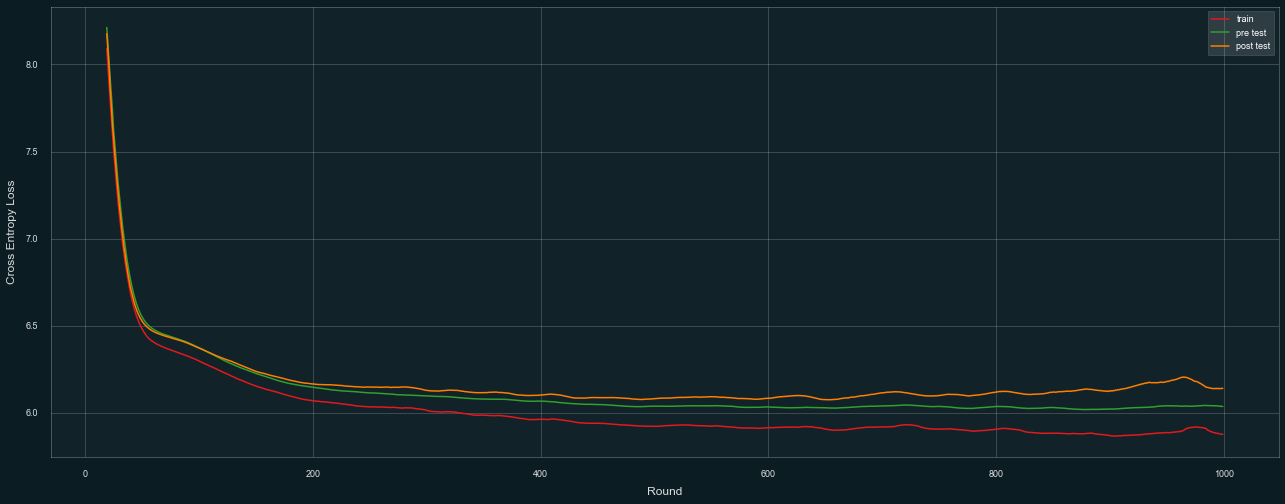

In [4]:
plt.plot(E_1_LR_0_001['train_loss'].mean(axis=1).rolling(20).mean(), label='train')
plt.plot(E_1_LR_0_001['pre_test_loss'].mean(axis=1).rolling(20).mean(), label='pre test')
plt.plot(E_1_LR_0_001['post_test_loss'].mean(axis=1).rolling(20).mean(), label='post test')
plt.legend()
plt.xlabel('Round')
plt.ylabel('Cross Entropy Loss')
plt.show()

### Accuracy

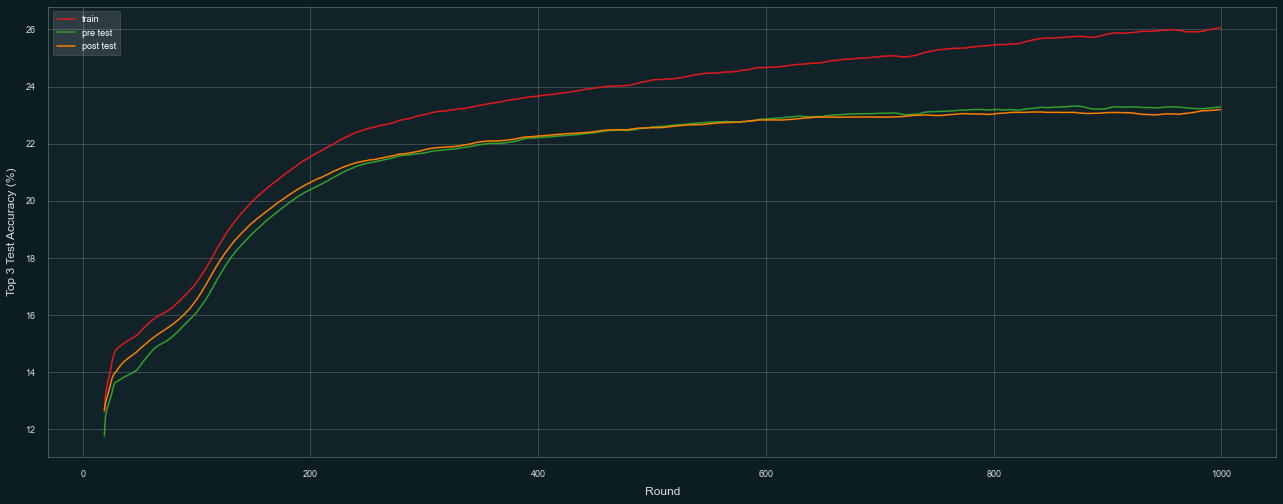

In [5]:
plt.plot(E_1_LR_0_001['train_acc'].mean(axis=1).rolling(20).mean() * 100, label='train')
plt.plot(E_1_LR_0_001['pre_test_acc'].mean(axis=1).rolling(20).mean() * 100, label='pre test')
plt.plot(E_1_LR_0_001['post_test_acc'].mean(axis=1).rolling(20).mean() * 100, label='post test')
plt.legend()
plt.xlabel('Round')
plt.ylabel('Top 3 Test Accuracy (%)')
plt.show()

## Client Accuracy Distribution

### Test

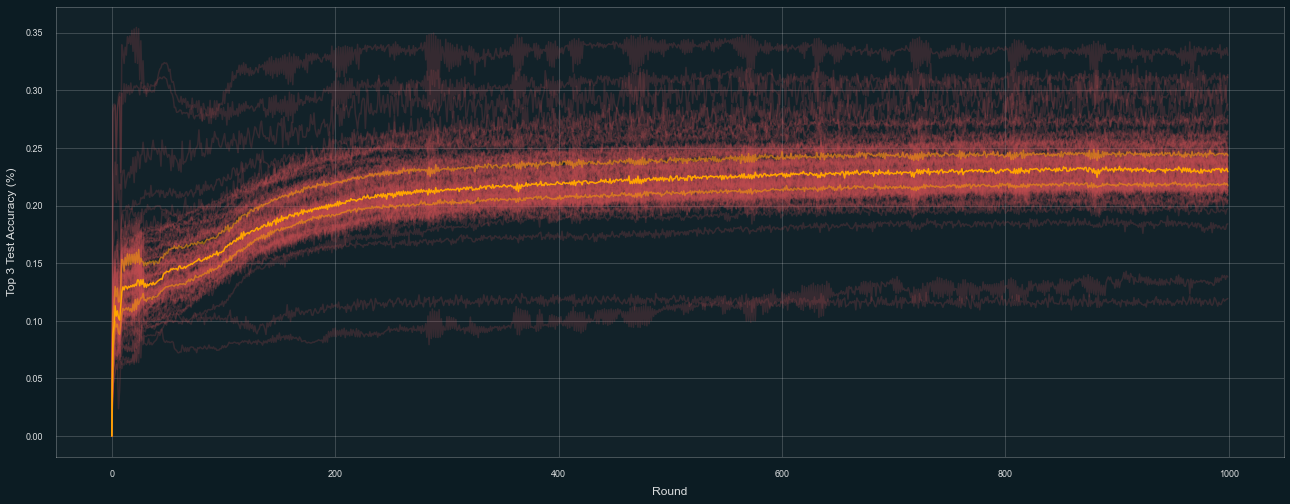

In [6]:
plot(E_1_LR_0_001, 'pre_test_acc')
plt.xlabel('Round')
plt.ylabel('Top 3 Test Accuracy (%)')
plt.show()

### Train

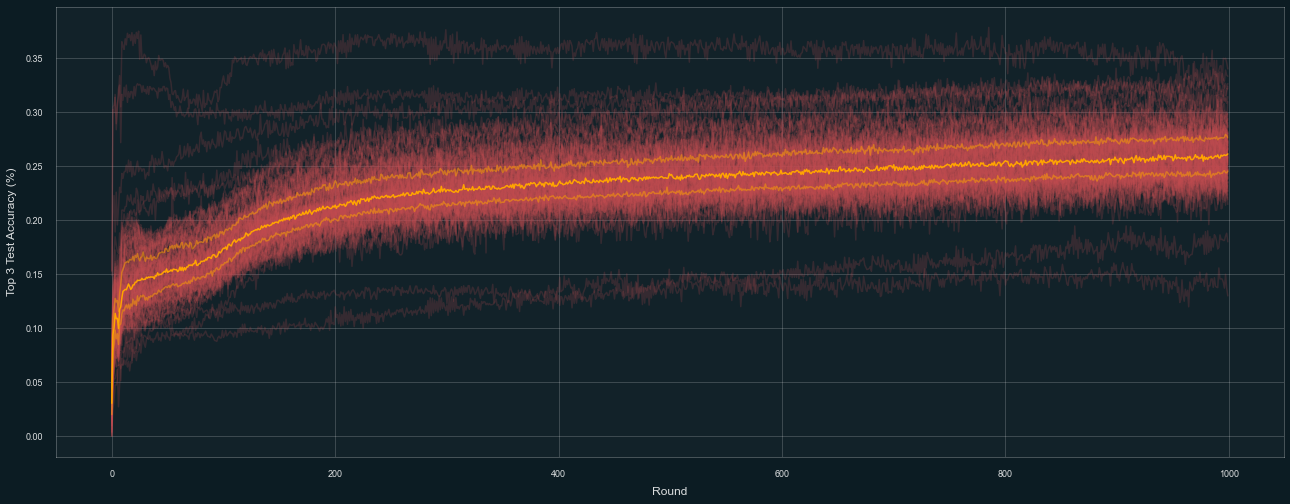

In [7]:
plot(E_1_LR_0_001, 'train_acc')
plt.xlabel('Round')
plt.ylabel('Top 3 Test Accuracy (%)')
plt.show()

### Change in Test Accuracy after Local Training

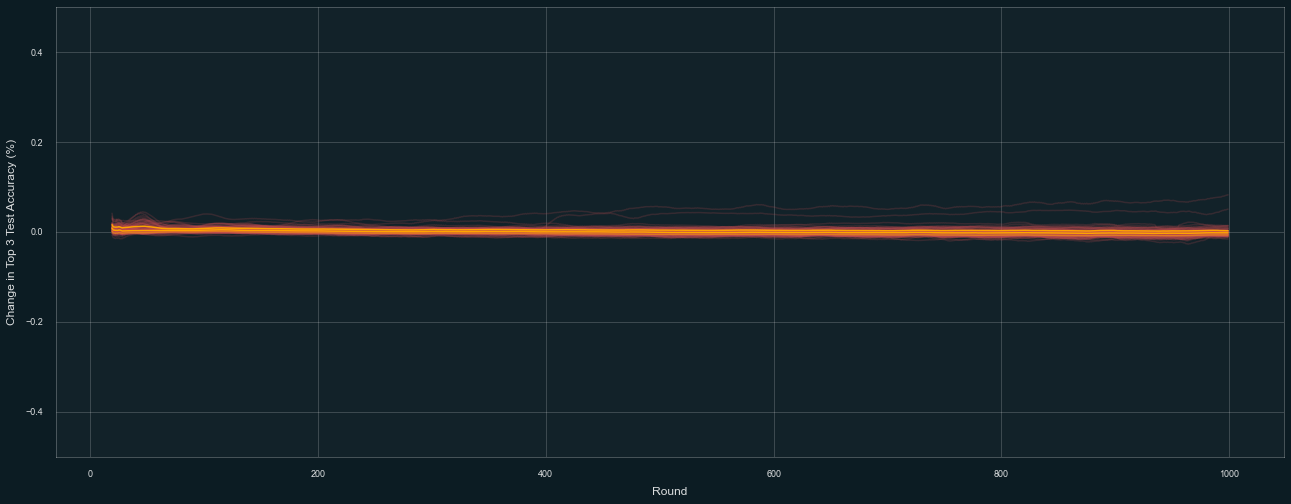

In [8]:
test_loss_gain = E_1_LR_0_001['post_test_acc'] - E_1_LR_0_001['pre_test_acc']
plot_processed(test_loss_gain, smoothing=20)
plt.xlabel('Round')
plt.ylabel('Change in Top 3 Test Accuracy (%)')
plt.ylim(-0.5, 0.5)
plt.show()

## Loss

### Test

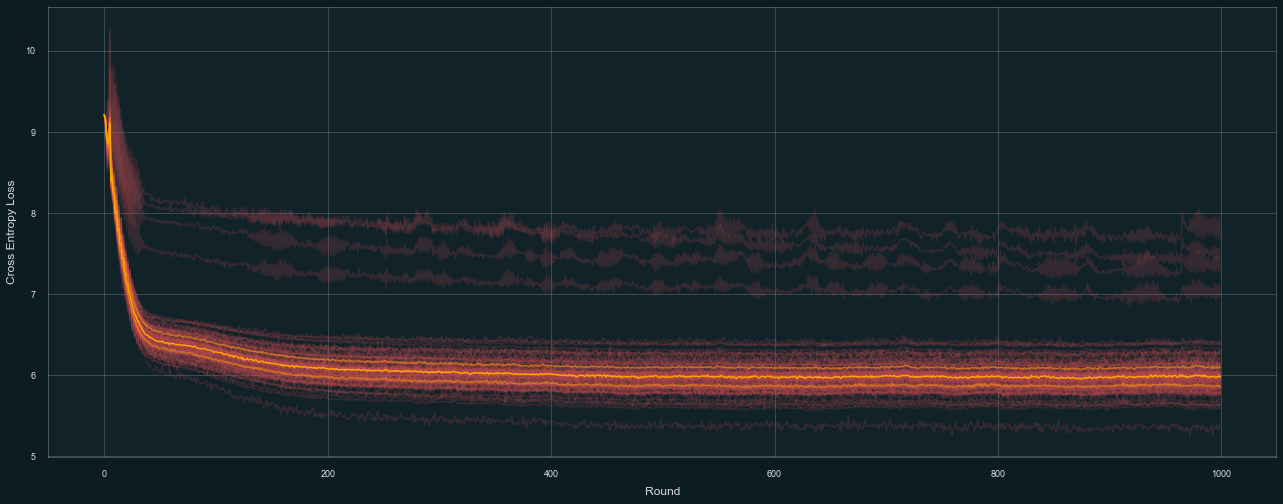

In [9]:
plot(E_1_LR_0_001, 'pre_test_loss')
plt.xlabel('Round')
plt.ylabel('Cross Entropy Loss')
plt.show()

## Train

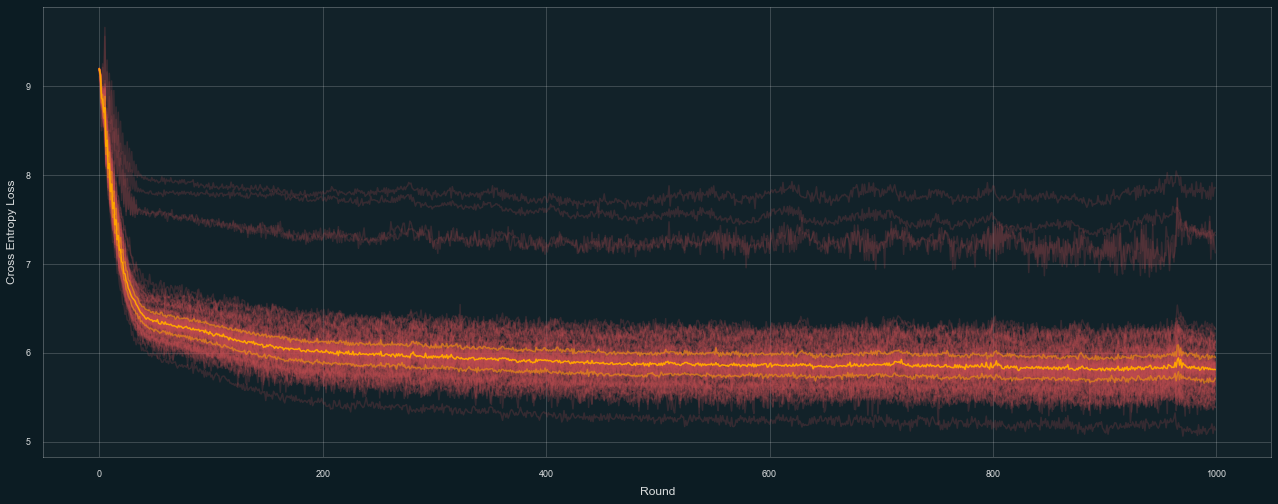

In [10]:
plot(E_1_LR_0_001, 'train_loss')
plt.xlabel('Round')
plt.ylabel('Cross Entropy Loss')
plt.show()

### Change in Test Loss after Local Training

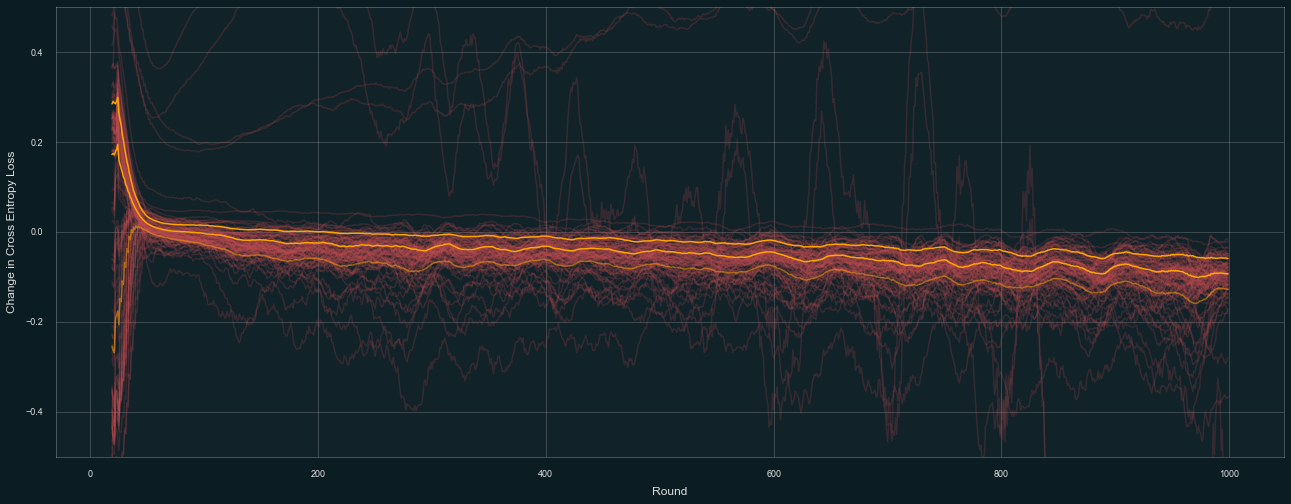

In [11]:
test_loss_gain = E_1_LR_0_001['pre_test_loss'] - E_1_LR_0_001['post_test_loss']
plot_processed(test_loss_gain, smoothing=20)
plt.xlabel('Round')
plt.ylabel('Change in Cross Entropy Loss')
plt.ylim(-0.5, 0.5)
plt.show()

## Client $L_2$ Norm Distribution

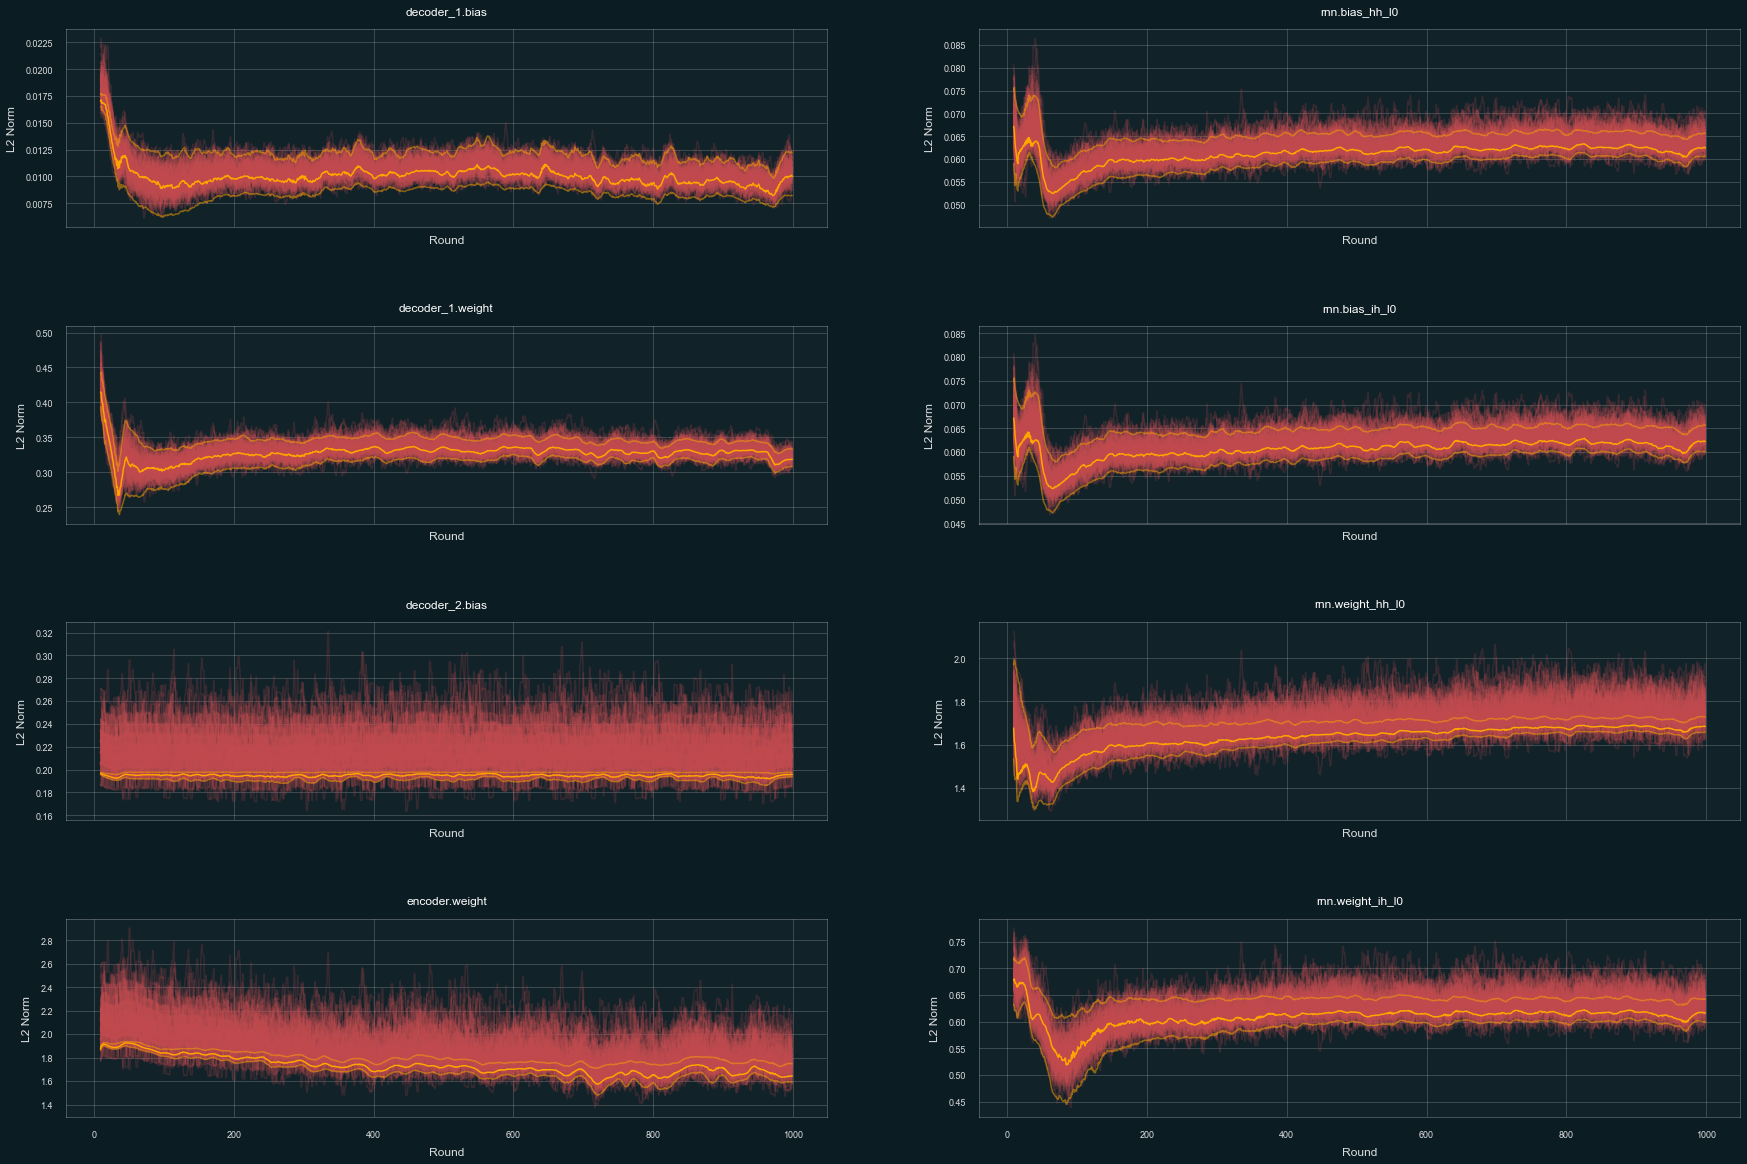

In [12]:
plot_l2_norms(E_1_LR_0_001, smoothing=10)

## Client Average Cosine Similiarity Distribution

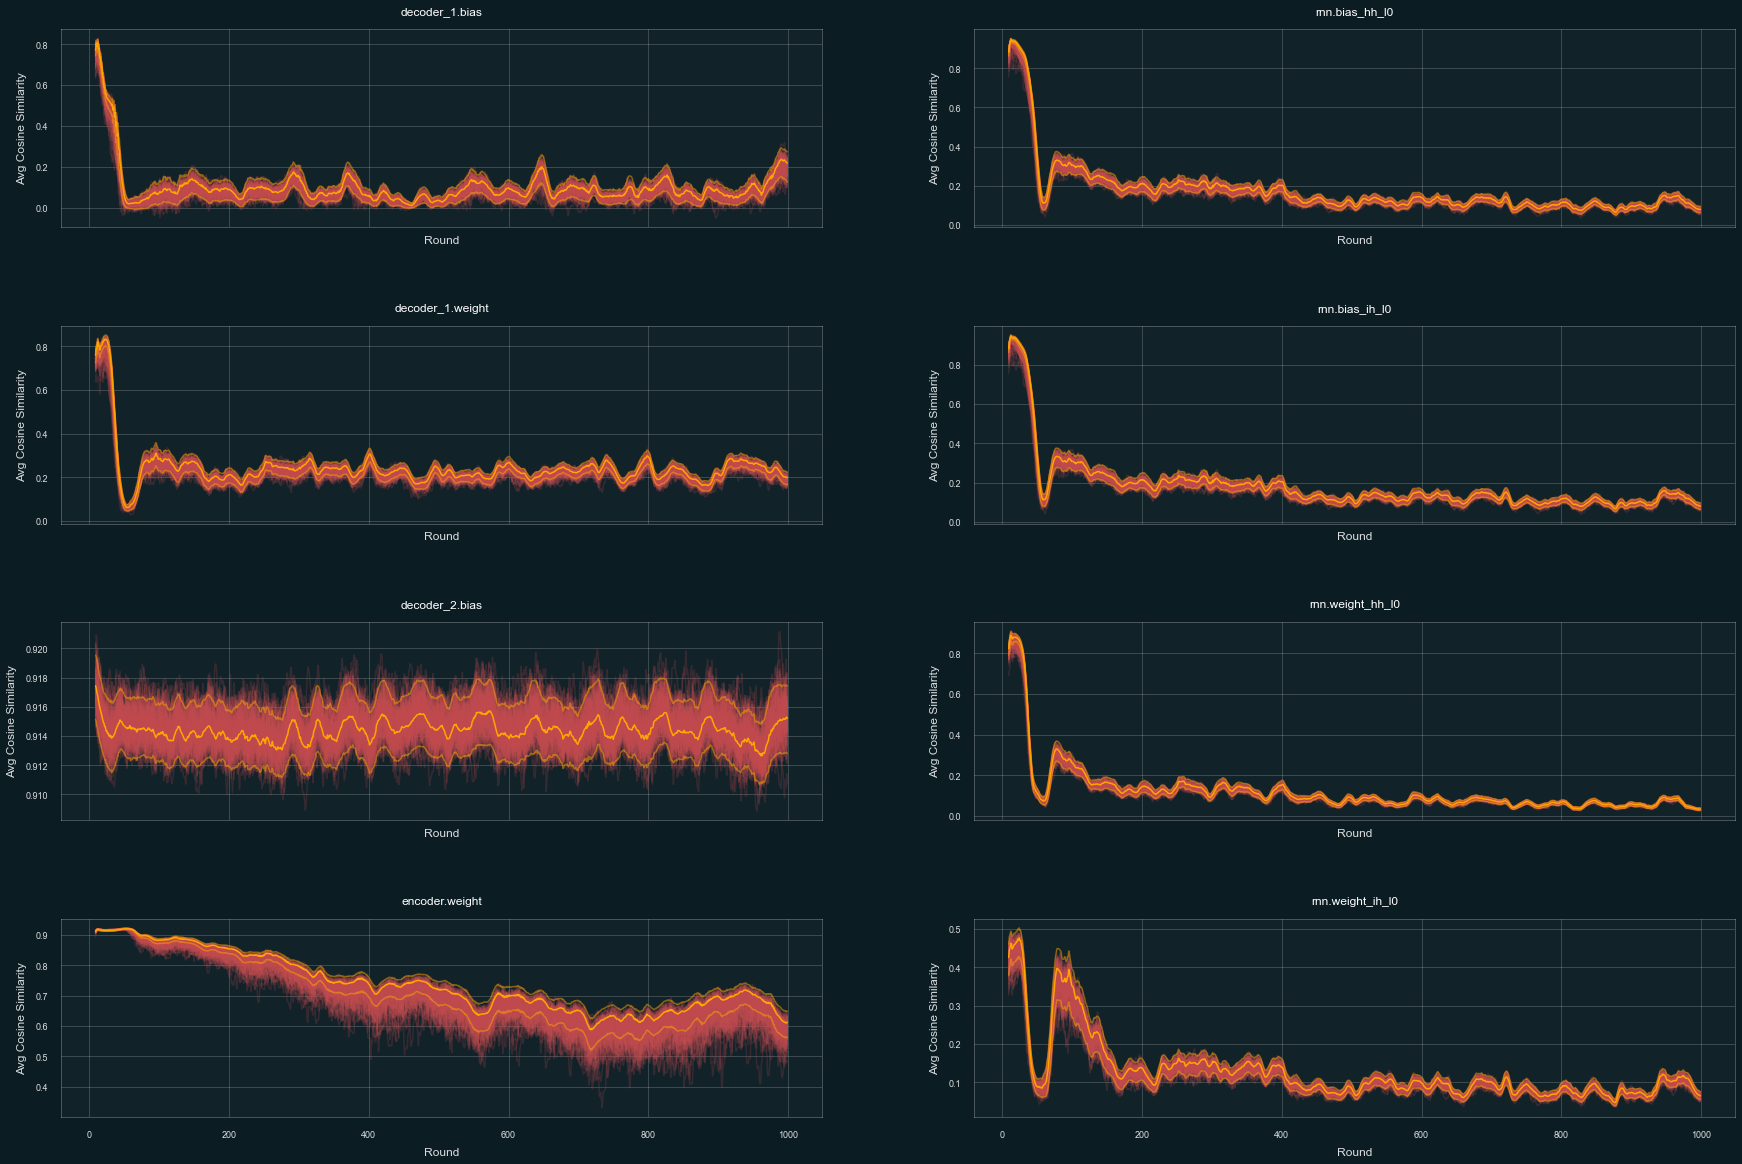

In [13]:
plot_cosine_similarity(E_1_LR_0_001, smoothing=10)

## Observations